# Citation for Data and Features

This data is a modified version of a dataset created by Paul Clough and Mark Stevenson, at the University of Sheffield. You can read about the data collection and corpus, at [their university webpage](https://ir.shef.ac.uk/cloughie/resources/plagiarism_corpus.html). 

> **Citation**: Clough, P. and Stevenson, M. Developing A Corpus of Plagiarised Short Answers, Language Resources and Evaluation: Special Issue on Plagiarism and Authorship Analysis, In Press.


The authors ask five questions regarding Computer Science. The questions are as follows:

>A. What is inheritance in Object-Oriented Programming? <br />
B. Explain the PageRank algorthim that used by the Google Search Engine.  <br />
C. Explain the Vector Space model that is used in Information Retrieval.  <br />
D. Explain Bayes Theorem in probability theory.  <br />
E. What is dynamic programming?  <br />

## Read in the Data

In [1]:
import pandas as pd
import numpy as np
import os

This plagiarism dataset is made of multiple text files; each of these files has characteristics that are is summarized in a `.csv` file named `file_information.csv`, which we can read in using `pandas`.

In [2]:
csv_file = 'data/file_information.csv'
plagiarism_df = pd.read_csv(csv_file)

plagiarism_df.head(5)

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non


## Types of Plagiarism

Each text file is associated with one **Task** (task A-E) and one **Category** of plagiarism, which you can see in the above DataFrame.

###  Tasks, A-E

Each text file contains an answer to one short question; these questions are labeled as tasks A-E. For example, Task A asks the question: "What is inheritance in object oriented programming?"

### Categories of Plagiarism 

Each text file has an associated plagiarism label and category:

**1. Plagiarized categories: `cut`, `light`, and `heavy`.**
* These categories represent different levels of plagiarized answer texts.
* `cut` answers copy directly from a source text.
* `light` answers are based on the source text but include some light rephrasing.
* `heavy` answers are based on the source text, but *heavily* rephrased. 
     
**2. Non-plagiarized category: `non`.** 
* `non` indicates that an answer is not plagiarized; the Wikipedia source text is not used to create this answer.
    
**3. Special, source text category: `orig`.**
* This is a specific category for the original, Wikipedia source text. We will use these files only for comparison purposes.

In [3]:
print('Number of files: ', plagiarism_df.shape[0])  # .shape[0] gives the rows 
print('Number of unique tasks/question types (A-E): ', (len(plagiarism_df['Task'].unique())))
print('Unique plagiarism categories: ', (plagiarism_df['Category'].unique()))

Number of files:  100
Number of unique tasks/question types (A-E):  5
Unique plagiarism categories:  ['non' 'cut' 'light' 'heavy' 'orig']


In total there are 100 files, 95 of which are answers (submitted by people) and 5 of which are the original, Wikipedia source texts.

The goal will be to use this information to classify any given answer text into one of two categories, plagiarized or not-plagiarized.

### Distribution of Data


In [5]:
counts_per_task=plagiarism_df.groupby(['Task']).size().reset_index(name="Counts")
print("\nTask:")
display(counts_per_task)

counts_per_category=plagiarism_df.groupby(['Category']).size().reset_index(name="Counts")
print("\nPlagiarism Levels:")
display(counts_per_category)

counts_task_and_plagiarism=plagiarism_df.groupby(['Task', 'Category']).size().reset_index(name="Counts")
print("\nTask & Plagiarism Level Combos :")
display(counts_task_and_plagiarism.head(10))


Task:


,Task,Counts
0,a,20
1,b,20
2,c,20
3,d,20
4,e,20



Plagiarism Levels:


,Category,Counts
0,cut,19
1,heavy,19
2,light,19
3,non,38
4,orig,5



Task & Plagiarism Level Combos :


,Task,Category,Counts
0,a,cut,4
1,a,heavy,3
2,a,light,3
3,a,non,9
4,a,orig,1
5,b,cut,3
6,b,heavy,4
7,b,light,3
8,b,non,9
9,b,orig,1


We can see that the counts follow a pattern broken down by task. Each task has one source text (original) and the highest number on `non` plagiarized cases.

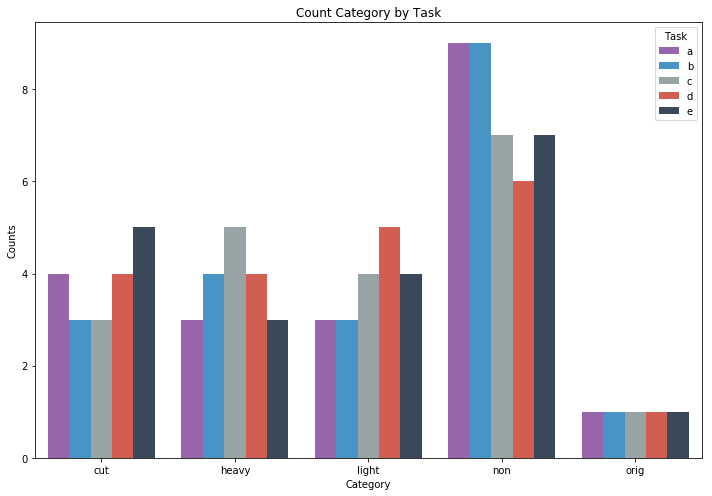

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)

group = ['Task', 'Category']
counts = plagiarism_df.groupby(group).size().reset_index(name="Counts").sort_values("Task")

plt.figure(figsize=(10,7))
sns.barplot(data=counts, x='Category',y='Counts', hue='Task')
plt.title("Count Category by Task")
plt.tight_layout()